In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
training_data = pd.read_csv('../data/processed/NFL_verse_training_data.csv')

In [39]:
y = training_data['Injury']

# train_numeric = training_data[['week','qtr', 'down', 'ydstogo','yardline_100','spread_line',
#                     'yards_gained', 'shotgun', 'no_huddle', 'qb_dropback',
#                     'qb_scramble','season','overtime', 'div_game', 'wind', 'temp', 'score_differential']]

# train_str = training_data[['game_half',
#                     'play_type',
#                     'pass_length','pass_location',
#                     'run_location', 'run_gap','weekday','roof', 
#                     'surface','stadium']]

In [41]:
train_numeric = training_data[['weekday', 'game', 'shotgun', 'qb_dropback', 'div_game', 'temp', 'wind', 'qtr', 'down', 'ydstogo']]

train_str = training_data[['run_gap', 'run_location', 'roof', 'pass_location', 'pass_length', 'surface', 'game_half', 'play_type', 'stadium']]

KeyError: "['Severity'] not in index"

In [ ]:
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pca = PCA()
le = LabelEncoder()
scaler = StandardScaler()
pipeline = make_pipeline(scaler, pca) 

for feat in train_str:
    train_str[feat] = le.fit_transform(train_str[feat].astype(str))

for feat in train_numeric:
    train_numeric[feat].fillna(train_numeric[feat].mean(), inplace=True)

/var/folders/fv/6ssdmf5n3cs0c8kp8swwnx280000gn/T/ipykernel_51299/3165086785.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_str[feat] = le.fit_transform(train_str[feat].astype(str))
/var/folders/fv/6ssdmf5n3cs0c8kp8swwnx280000gn/T/ipykernel_51299/3165086785.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_str[feat] = le.fit_transform(train_str[feat].astype(str))
/var/folders/fv/6ssdmf5n3cs0c8kp8swwnx280000gn/T/ipykernel_51299/3165086785.py:12: SettingWithCopyWarning: 
A value is trying 

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=41)

In [ ]:
df_processed = pd.DataFrame(
    data=X_enc, 
    index=pd.concat([train_numeric, train_str], axis=1).index, 
    columns=pd.concat([train_numeric, train_str], axis=1).columns
)

In [ ]:
from sklearn.linear_model import LinearRegression


linr = LinearRegression()
linr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#See the R-Squared
from sklearn.metrics import precision_score, recall_score


score = linr.score(X_test, y_test)
print("R-squared: {:.2f}".format(score))

#Now test the model
y_pred = linr.predict(X_test)
print('Training Set:', linr.score(X_train,y_train))
print('Test Set:', linr.score(X_test,y_test))

# Calculate the accuracy, precision, and recall scores
# print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred, average='macro')*100))
# print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred, average='macro')*100))


R-squared: 0.00
Training Set: 0.002639805846029075
Test Set: 0.002463490671658186


In [ ]:
from sklearn.feature_selection import mutual_info_classif

combined_data = pd.concat([train_numeric, train_str], axis=1)
ig = mutual_info_classif(combined_data, y, random_state=42)
ig

array([0.10265181, 0.08464792, 0.07822439, 0.04607533, 0.03186872,
       0.0346991 , 0.0331854 , 0.03768499, 0.04569219, 0.09451222,
       0.09340332, 0.0922733 , 0.08567903, 0.05618723, 0.05324485,
       0.05234897, 0.05140163, 0.00504737])

In [ ]:
# Create a dictionary to store the feature and its information gain
ig_dict = {}
for i in range(len(combined_data.columns)):
    ig_dict[combined_data.columns[i]] = ig[i]

In [ ]:
ig_dict_sorted = dict(sorted(ig_dict.items(), key=lambda item: item[1], reverse=True))

# Select the top n features with the highest information gain
n = 10
selected_features = list(ig_dict_sorted.keys())[:n]

# Print the selected features
print('Selected Features:')
print(selected_features)

Selected Features:
['weekday', 'run_gap', 'run_location', 'roof', 'pass_location', 'shotgun', 'qb_dropback', 'pass_length', 'surface', 'game_half']


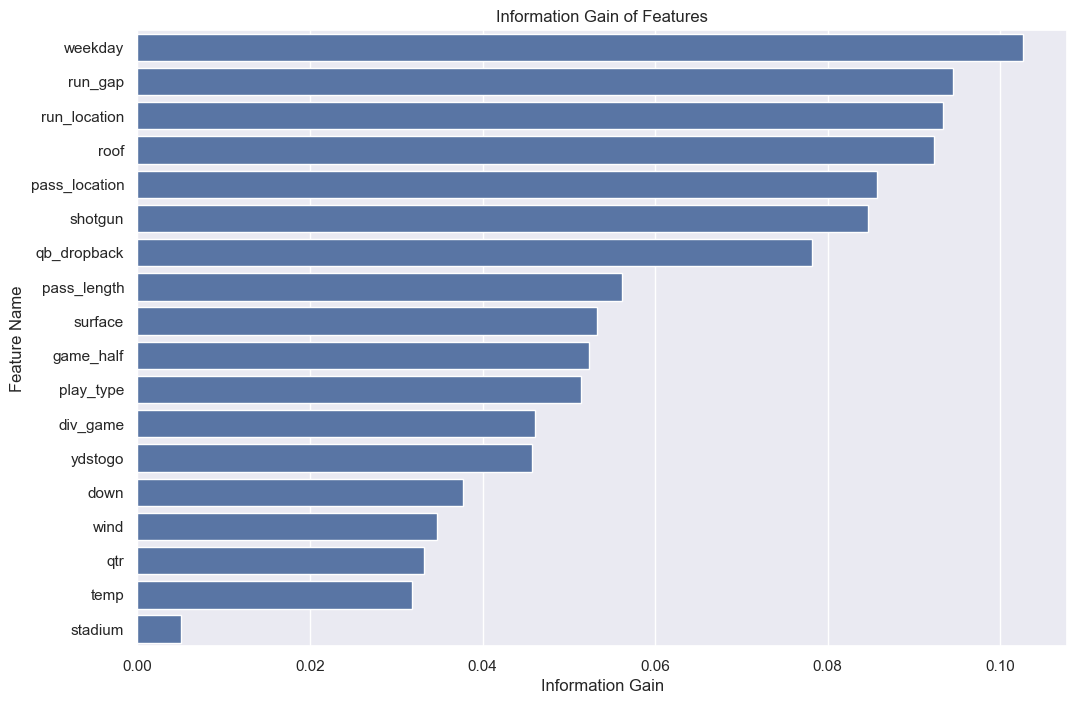

In [ ]:
# Visualize the information gain of each feature
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=list(ig_dict_sorted.values()), y=list(ig_dict_sorted.keys()))
plt.title('Information Gain of Features')
plt.xlabel('Information Gain')
plt.ylabel('Feature Name')
plt.show()